In [2]:
#--------------Importing Libraries--------------#
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [7]:
#--------------Reading Dataset-----------------#
df = pd.read_csv("url-data.txt")
print("Size of Original Dataset")
print(df.shape)
X= df.drop(['data1'], axis=1)
y=df['data1'] 

Size of Original Dataset
(1000, 65)


In [44]:
#---------------Defining Function--------------#

def misclassification_rate(y,y_estimated):
    count=0
    for i in range(len(y)):
        if y_estimated[i]!= y[i]:
            count= count+1
    miscl_rate = count/len(y)*100
    return miscl_rate

def SVM_classifier():    
    svclassifier = SVC(kernel='rbf', max_iter=300, gamma='auto')  
    svclassifier.fit(X_train, y_train) 
    y_pred=svclassifier.predict(X_test)
    mis_clf_rate= misclassification_rate(y_test, y_pred)
    return mis_clf_rate

Size of Original Dataset
(1000, 65)


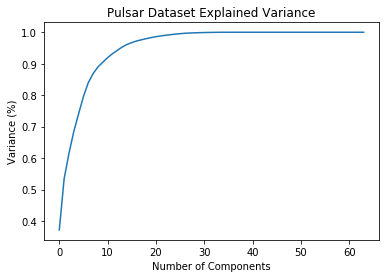

In [38]:
#--------------Reading Dataset-----------------#
df = pd.read_csv("url-data.txt")
print("Size of Original Dataset")
print(df.shape)
X= df.drop(['data1'], axis=1)
y=df['data1'] 

#Fitting the PCA algorithm with our Data
from sklearn.decomposition import PCA
#Plotting the Cumulative Summation of the Explained Variance
pca = PCA()
pca.fit(X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [39]:
pca = PCA(n_components=20)
pca.fit(X)
X_pca = pca.transform(X)
#print(X_pca.shape)
X= pd.DataFrame(X_pca)
df_pca = pd.concat([y, X], axis=1)
print(' ')
print('Size of dataset after applying PCA')
print(df_pca.shape)

data_X= X.values
data_y=y.values
#print(data_y)
print('-------------------------------------')
print(' ')

 
Size of dataset after applying PCA
(1000, 21)
-------------------------------------
 


## Average Misclassification Rate 

In [45]:
#Implementing SMM
import warnings
warnings.filterwarnings('ignore')


kf = KFold(n_splits=10, shuffle=False)
kf.get_n_splits(data_X)
mis_clf_list=[]
for train_index, test_index in kf.split(data_X):
    X_train, X_test = data_X[train_index], data_X[test_index]
    y_train, y_test = data_y[train_index], data_y[test_index] 
    mis_clf= SVM_classifier()
    mis_clf_list.append(mis_clf)

print("Average Misclassification Rate")
print(np.mean(mis_clf_list))

Average Misclassification Rate
28.5


Correlation


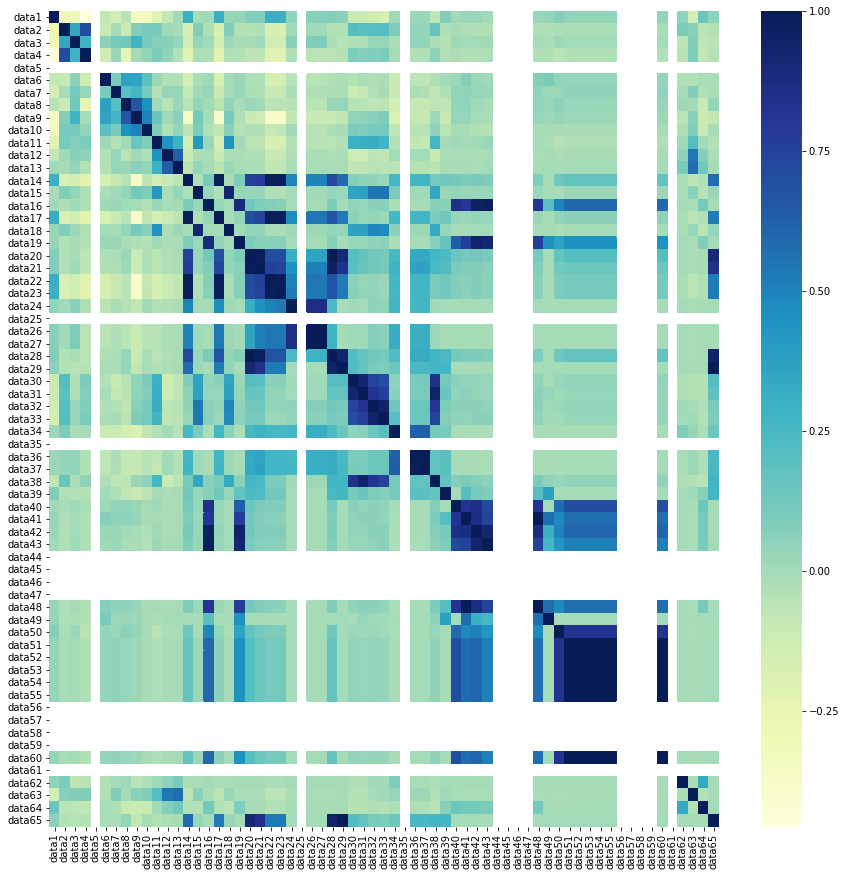

In [4]:
print('Correlation')
import seaborn as sns
corrmat = df.corr() 
f, ax = plt.subplots(figsize=(15, 15))
#cmap = sns.diverging_palette(250, 10, n=65)
sns.heatmap(corrmat, cmap="YlGnBu"); 
plt.show()

In [9]:
# Create correlation matrix
corr_matrix = df.corr(method='pearson', min_periods=1).round(2).abs()
#print(corr_matrix)
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] == 0.00)]
print("Maximum Number of Uncorrelated Features:")
print(len(to_drop))


Maximum Number of Uncorrelated Features:
31


## Comment : 
Average Misclassification Rate = 28.5% and 
Maximum Number of Uncorrelated Features = 31
